# A3-Q5: Time of Death

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## (a) Dynamics Function

In [2]:
# Dynamics function
# === YOUR CODE HERE ===

# helper function

# from 9 to next day's 11
# total 26 hours
# 9 is the starting point, we record it as 0
# returns an integer
# start time is important
# we deduce when Robert dies, comparing to 9am
# for instance, if Robert died in 4pm, the start time will be 7
def roomTemp(t,start):
    final = t + start
    if final <= 9:
        return 22
    elif 9 < final <= 11:
        return 22 - (final - 9) * 3.5
    elif 11 < final <= 22:
        return 15
    elif 22 < final <= 22.5:
        return 15 + (final-22) * 14
    else:
        return 22
    

def bodyTemp(T,t,A,B):
    k = -0.15
    
    dydt = k * (T - roomTemp(t,7)) + (A + 2 * B) / 100
    
    return dydt

def bacA(T,A):
    k = 0.0015
    if 29 <= T <= 45:
        dydt = k * pow(T - 29, 2) * (1 - np.exp(0.08 * (T - 45))) * A * (30 - A)
    else:
        dydt = 0
    return dydt

def bacB(T,B):
    k = 0.002
    if 13 <= T <= 26:
        dydt = k * pow(T - 13, 2) * (1 - np.exp(0.05 * (T - 26))) * B * (20 - B)
    else:
        dydt = 0
    return dydt

def f(t, y):
    return np.array([bacA(y[2], y[0]), bacB(y[2],y[1]), bodyTemp(y[2], t, y[0], y[1])])


## (b) Run the simulation

In [3]:
# === YOUR CODE HERE ===
# initial condition

A0 = 1
B0 = 1
T0 = 37.5



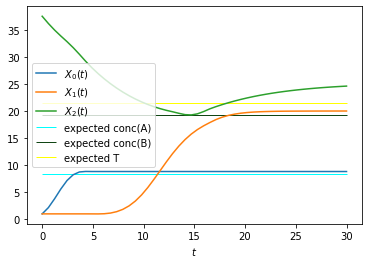

In [4]:
# Plot body temp, A, and B, and display the final state.

# === YOUR CODE HERE ===

# time points
tspan = (0.0,30.0)
t = np.linspace(0,30)

# y0
y0=[A0,B0,T0]

# solve ODE
sol = solve_ivp(f,t_span = tspan, y0=y0, t_eval = t)

plt.hlines(y=8.3, xmin=0, xmax=30, colors='aqua', linestyles='-', lw=1, label='expected conc(A)')
plt.hlines(y=19.2, xmin=0, xmax=30, colors='#114514', linestyles='-', lw=1, label='expected conc(B)')
plt.hlines(y=21.5, xmin=0, xmax=30, colors='yellow', linestyles='-', lw=1, label='expected T')
for i in range(sol.y.shape[0]):
    plt.plot(sol.t, sol.y[i], label=f'$X_{i}(t)$')

plt.xlabel('$t$') # the horizontal axis represents the time 
plt.legend() # show how the colors correspond to the components of X

plt.show()

## (c) Prime Suspect

Double-click to answer here.<br>


In [5]:
# Dennis Rillerson killed Robert Durst. First, we detect the time by changing the start time. If the start time is 0, 
# then Robert was killed at 9 am. As the time range could be between 9 am to 6 pm, we detect the possible time by changing
# the start time variable.
# x0 is Bac(A)'s concentration, x1 is Bac(B)'s concentration, x2 is Bac(C)'s concentration, as the graph shown
# Actually from the start time = 0, we can see thatafter 26 hours, the interpolation point of bodyTemp and Exp(BodyTemp),
# conc(B) and Exp(concB) does not match.
# we keep changing the start time, until I found when start time is 7
# at this time, when t = 18.5, we can see 16 + 18.5 = 34.5, equal to the time of finding his death
# we can see three interpolations, temperature, bac A's concentration, and bac B's concentration
# therefore, Robert Durst died 4pm on the previous day
# since Dennis' activity was unconfirmed, we can say that
# Dennis Rillerson killer Robert Durst.